# Содержание
1. Линейная регрессия
   1. Постановка задачи
   2. Функция ошибок
   3. Градиентный спуск
2. Двумерный случай
   1. Создаём тестовый датасет
   2. Настраиваем модель
   3. Визуализируем результат
   4. Визуализируем пространство параметров
   5. Эксперименты
3. Многомерный случай
   1. Создаём тестовый датасет
   2. Эксперименты

# Линейная регрессия
## Постановка задачи
Имеем массив $X\in\R^n$ и вектор $y\in\R$. Нужно построить прямую $y=\theta_0+\theta_1x$ с помощью метода наименьших квадратов.

## Функция ошибок
Использовалась функция
$$ J(\theta)=\frac{1}{2m} \sum_{i=1}^m(h_\theta(x_i)-y_i) $$

## Градиентный спуск
Использовалась формула
$$ \theta := \theta - \frac{1}{\alpha}X^T(X\theta-y) $$

# Двумерный случай

In [1]:
from reg import cv_score
from reg import LinearRegression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

## Создаём тестовый датасет

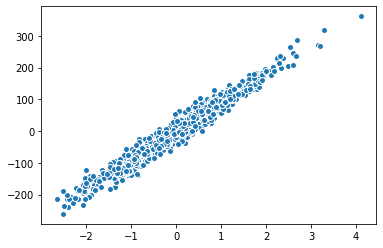

In [2]:
X, y = make_regression(n_samples=1000, n_features=1, noise=20, random_state=2)
plt.scatter(X[:, 0], y, edgecolors='white')
plt.show()

## Настраиваем модель

In [3]:
m = LinearRegression()
m.fit(X, y)

## Визуализируем результат

theta params: [ 0.13159686 90.94102722],
best score: 185.38656173991222


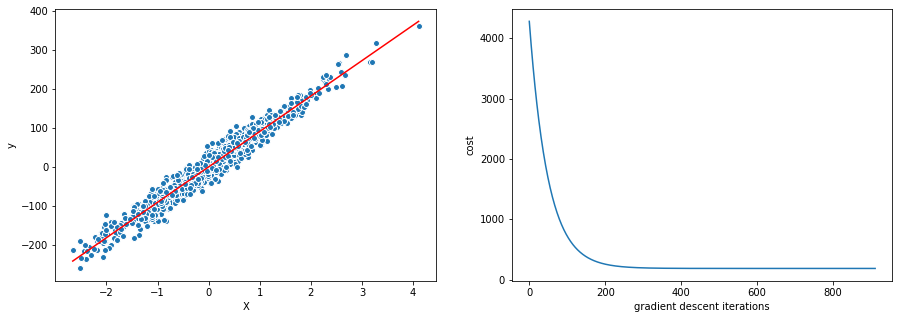

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(X, y, edgecolors='white')
x_plt = np.linspace(X.min(), X.max(), 2)
y_plt = m.theta[0] + m.theta[1] * x_plt
ax[0].plot(x_plt, y_plt, color='red')
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')

ax[1].plot(m.cost_history)
ax[1].set_xlabel('gradient descent iterations')
ax[1].set_ylabel('cost')
print(f"theta params: {m.theta},\nbest score: {m.best_score}")

## Визуализируем пространство параметров

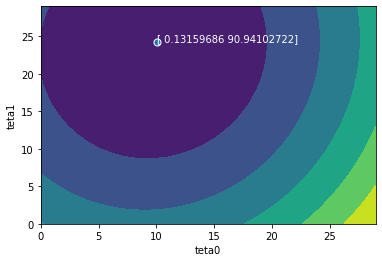

In [5]:
r = [[-50, 100], [10, 110]]
m.contour_plot(r=r, show_best=True)

## Эксперименты

mean result is 186.08664633705507


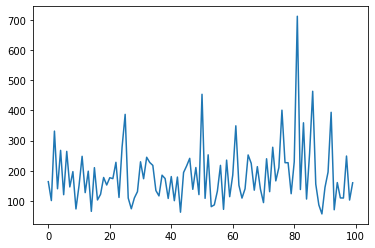

In [6]:
cv = cv_score(X, y, n_splits=100)
plt.plot(cv)
print(f'mean result is {cv.mean()}')

# Многомерный случай
## Создаём тестовый датасет

In [7]:
X, y = make_regression(n_samples=1000, n_features=2, noise=20, random_state=2)

## Эксперименты

mean result is 212.84415683598644


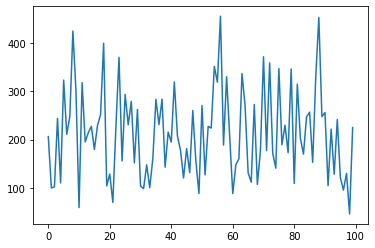

In [9]:
cv = cv_score(X, y, n_splits=100)
plt.plot(cv)
print(f'mean result is {cv.mean()}')

Результаты почти не отличаются от двумерного случая. Значит, работает :)